In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import numpy as np

sns.set_style("whitegrid")
sns.set_context("paper")

In [41]:
! pip3 freeze > requirements.txt

In [42]:
df = pd.read_csv("./results/baseline_comparison.csv")
display(df)

,model_name,feature_set,seq_len,trial,pr_auc,precision@5,precision@10,precision@15,precision@20,precision@25,precision@30
0,bitenet,dxtx,6,1,0.336246,0.360089,0.229216,0.185870,0.175496,0.173372,0.172986
1,bitenet,dx,6,1,0.356011,0.354356,0.231733,0.187129,0.176139,0.173833,0.173432
2,rnn,dxtx,6,1,0.370498,0.312022,0.190712,0.154687,0.146369,0.144686,0.144369
3,rnn,dx,6,1,0.365696,0.338178,0.213149,0.174150,0.164951,0.163205,0.162883
4,brnn,dxtx,6,1,0.407296,0.328400,0.201754,0.164658,0.156453,0.154828,0.154535
...,...,...,...,...,...,...,...,...,...,...,...
595,brnn,dx,16,10,0.345988,0.306378,0.182999,0.147717,0.138670,0.136707,0.136246
596,retain,dxtx,16,10,0.322365,0.411600,0.270650,0.219669,0.205147,0.201708,0.201078
597,retain,dx,16,10,0.336884,0.400356,0.263322,0.216178,0.202479,0.199025,0.198208
598,deepr,dxtx,16,10,0.343574,0.415622,0.270624,0.222064,0.208349,0.204921,0.204194


In [48]:
grouped_df = df.groupby(by=["model_name", "feature_set"]).mean().drop(columns=[ "seq_len", "trial"])
grouped_df.to_csv("scratch.csv")
display(df.groupby(by=["model_name", "feature_set"]).mean().drop(columns=["seq_len", "trial"]).round(3).reset_index())

,model_name,feature_set,pr_auc,precision@5,precision@10,precision@15,precision@20,precision@25,precision@30
0,bitenet,dx,0.350,0.351,0.223,0.180,0.169,0.167,0.166
1,bitenet,dxtx,0.357,0.336,0.215,0.173,0.162,0.160,0.160
2,brnn,dx,0.374,0.327,0.200,0.162,0.153,0.150,0.150
3,brnn,dxtx,0.372,0.316,0.193,0.156,0.147,0.145,0.145
4,deepr,dx,0.347,0.435,0.288,0.237,0.223,0.220,0.220
5,deepr,dxtx,0.359,0.435,0.288,0.238,0.224,0.221,0.220
6,retain,dx,0.346,0.412,0.270,0.221,0.208,0.205,0.204
7,retain,dxtx,0.342,0.409,0.269,0.220,0.207,0.204,0.203
8,rnn,dx,0.366,0.324,0.198,0.160,0.151,0.149,0.148
9,rnn,dxtx,0.370,0.314,0.192,0.156,0.146,0.144,0.144


,model_name,feature_set,seq_len,precision@20
0,bitenet,dx,6,0.168437
1,bitenet,dx,8,0.163302
2,bitenet,dx,10,0.170083
3,bitenet,dx,12,0.170169
4,bitenet,dx,14,0.177091


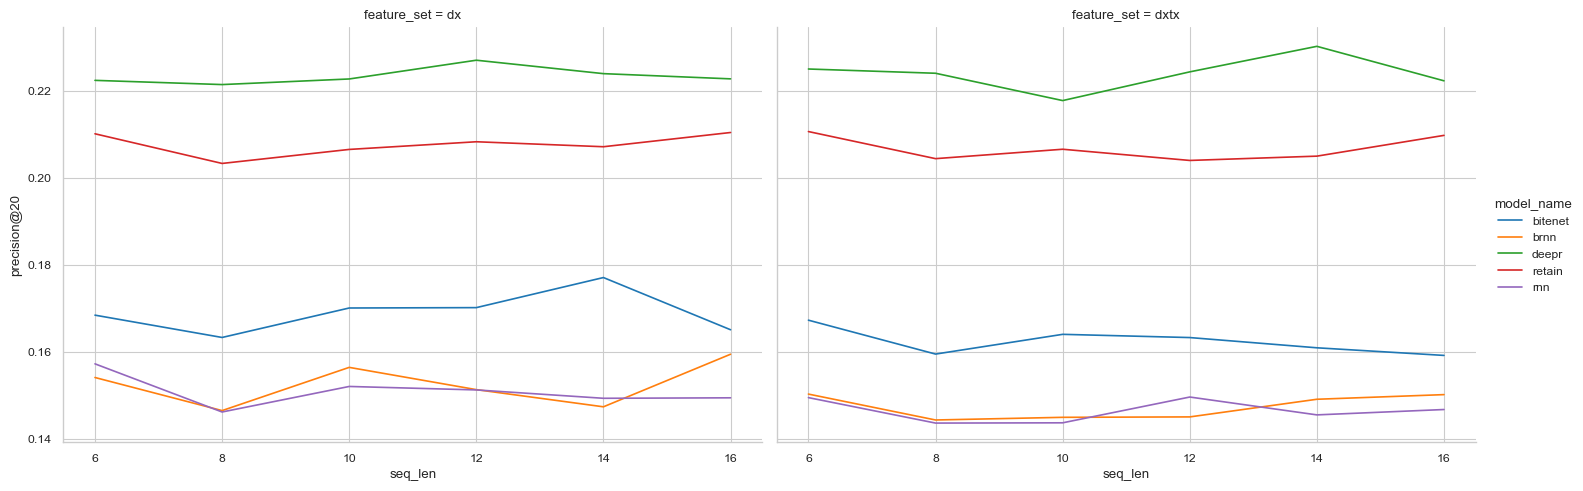

In [46]:
robustness_comp_df = df[['model_name', 'feature_set', 'seq_len', 'precision@20']]
robustness_comp_df = robustness_comp_df.groupby(by=['model_name', 'feature_set', 'seq_len']).mean().reset_index()
display(robustness_comp_df.head())

g = sns.relplot(
    data=robustness_comp_df,
    x='seq_len',
    y='precision@20',
    col='feature_set',
    hue='model_name',
    kind='line',
    aspect=1.5
)

plt.savefig("test.png")

In [47]:
precisions_np = precisions_df.to_numpy()
nonzero = np.where(precisions_np.sum(axis=1) > 0, True, False)
display(df.loc[nonzero].groupby(by=["model_name", "feature_set"]).mean().drop(columns=["seq_len", "trial", "roc_auc", "f1"]))

NameError: name 'precisions_df' is not defined